# Allen Brain Atlas Developing Human Brain Sample (microarray)

Author: Moshe Silverstein <br/>
Date: 3-18 <br/>
Data Source: http://www.brainspan.org/static/download.html

In [1]:
import sys, datetime
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [3]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAINSPAN atlas of the developing brain/Developnetal Transcriptome Dataset/Microarray/my_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Tue Mar 06 14:01:01 2018 EST

# Path to Output Files

In [5]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAINSPAN atlas of the developing brain/Developnetal Transcriptome Dataset/Microarray/Output/'

# Load Data

In [6]:
matrix = pd.read_csv('input/gene_array_matrix_csv/expression_matrix.csv', header=None, index_col=0)

In [7]:
matrix.head()

,1,2,3,4,5,6,7,8,9,10,...,483,484,485,486,487,488,489,490,491,492
0,,,,,,,,,,,,,,,,,,,,,
1,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
2,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
3,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
4,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
5,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


In [8]:
matrix.shape

(17604, 492)

# Load Sample Metadata

In [9]:
sample_meta = pd.read_csv('input/gene_array_matrix_csv/columns_metadata.csv', index_col=0)

In [10]:
sample_meta.head()

,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name
column_num,,,,,,,
1,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex
2,13058,H376.IIA.51,8 pcw,M,10552,CGE,caudal ganglionic eminence
3,13058,H376.IIA.51,8 pcw,M,10173,DFC,dorsolateral prefrontal cortex
4,13058,H376.IIA.51,8 pcw,M,10391,DTH,dorsal thalamus
5,13058,H376.IIA.51,8 pcw,M,10294,HIP,hippocampus (hippocampal formation)


In [11]:
sample_meta.shape

(492, 7)

# Load Gene Metadata

In [12]:
gene_meta = pd.read_csv('input/gene_array_matrix_csv/rows_metadata.csv', index_col=0)

In [13]:
gene_meta.head()

,gene_id,ensembl_gene_id,gene_symbol,entrez_id
row_num,,,,
1,9633,ENSG00000101337,TM9SF4,9777
2,22692,ENSG00000114650,SCAP,22937
3,22952,ENSG00000113194,FAF2,23197
4,34497,ENSG00000150401,DCUN1D2,55208
5,35224,ENSG00000204444,APOM,55937


In [14]:
gene_meta.shape

(17604, 4)

# Map Sample Metadata to Sample ID

In [18]:
lst = []

for i,col in enumerate(matrix.columns):
    col_num = i+1
    sample = str(sample_meta.loc[col_num, 'structure_name'])+'_'+str(sample_meta.loc[col_num, 'age'])+'_'+ str(sample_meta.loc[col_num, 'gender'])+'_'+str(sample_meta.loc[col_num, 'donor_id'])
                       
    lst.append(sample)
    
matrix.columns = lst

In [19]:
matrix.head()

,amygdaloid complex_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,hippocampus (hippocampal formation)_8 pcw_M_13058,"inferolateral temporal cortex (area TEv, area 20)_8 pcw_M_13058",lateral ganglionic eminence_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,...,"inferolateral temporal cortex (area TEv, area 20)_40 yrs_F_12304","primary motor cortex (area M1, area 4)_40 yrs_F_12304",mediodorsal nucleus of thalamus_40 yrs_F_12304,anterior (rostral) cingulate (medial prefrontal) cortex_40 yrs_F_12304,orbital frontal cortex_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304",posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",ventrolateral prefrontal cortex_40 yrs_F_12304
0,,,,,,,,,,,,,,,,,,,,,
1,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
2,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
3,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
4,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
5,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


# Map Gene to Row

In [20]:
matrix.index = gene_meta['gene_symbol']

In [21]:
matrix.index.name = ''

In [22]:
matrix.head()

,amygdaloid complex_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,hippocampus (hippocampal formation)_8 pcw_M_13058,"inferolateral temporal cortex (area TEv, area 20)_8 pcw_M_13058",lateral ganglionic eminence_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,...,"inferolateral temporal cortex (area TEv, area 20)_40 yrs_F_12304","primary motor cortex (area M1, area 4)_40 yrs_F_12304",mediodorsal nucleus of thalamus_40 yrs_F_12304,anterior (rostral) cingulate (medial prefrontal) cortex_40 yrs_F_12304,orbital frontal cortex_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304",posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",ventrolateral prefrontal cortex_40 yrs_F_12304
,,,,,,,,,,,,,,,,,,,,,
TM9SF4,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
SCAP,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
FAF2,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
DCUN1D2,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
APOM,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


# Save Unfiltered Matrix to file

In [23]:
filename = path+'aba_dev_mic_samp_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [24]:
normalized_matrix = matrix.copy()

In [25]:
normalized_matrix.head()

,amygdaloid complex_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,hippocampus (hippocampal formation)_8 pcw_M_13058,"inferolateral temporal cortex (area TEv, area 20)_8 pcw_M_13058",lateral ganglionic eminence_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,...,"inferolateral temporal cortex (area TEv, area 20)_40 yrs_F_12304","primary motor cortex (area M1, area 4)_40 yrs_F_12304",mediodorsal nucleus of thalamus_40 yrs_F_12304,anterior (rostral) cingulate (medial prefrontal) cortex_40 yrs_F_12304,orbital frontal cortex_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304",posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",ventrolateral prefrontal cortex_40 yrs_F_12304
,,,,,,,,,,,,,,,,,,,,,
TM9SF4,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
SCAP,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
FAF2,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
DCUN1D2,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
APOM,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


In [26]:
normalized_matrix.shape

(17604, 492)

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [27]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [28]:
normalized_matrix.shape

(17604, 492)

# Log2 Transform

In [29]:
normalized_matrix = mf.log2(normalized_matrix)

In [30]:
normalized_matrix.head()

,amygdaloid complex_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,hippocampus (hippocampal formation)_8 pcw_M_13058,"inferolateral temporal cortex (area TEv, area 20)_8 pcw_M_13058",lateral ganglionic eminence_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,...,"inferolateral temporal cortex (area TEv, area 20)_40 yrs_F_12304","primary motor cortex (area M1, area 4)_40 yrs_F_12304",mediodorsal nucleus of thalamus_40 yrs_F_12304,anterior (rostral) cingulate (medial prefrontal) cortex_40 yrs_F_12304,orbital frontal cortex_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304",posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",ventrolateral prefrontal cortex_40 yrs_F_12304
TM9SF4,3.345675,3.371981,3.340337,3.362943,3.346489,3.395334,3.359887,3.366055,3.345868,3.339850,...,3.332134,3.289643,3.301567,3.223472,3.372179,3.278535,3.412726,3.251199,3.354667,3.412616
SCAP,3.233276,3.237386,3.304060,3.294862,3.297426,3.257068,3.236831,3.301358,3.254134,3.224252,...,3.224596,3.240556,3.249089,3.201138,3.192556,3.254925,3.195107,3.288613,3.270442,3.198590
FAF2,3.372871,3.403892,3.428109,3.397499,3.407846,3.375258,3.399547,3.437764,3.400483,3.373207,...,3.237522,3.254931,3.325494,3.204382,3.309070,3.288607,3.338065,3.232690,3.330426,3.296767
DCUN1D2,2.868602,2.951286,2.908010,3.043399,2.930796,2.993468,2.953034,2.940793,3.012463,2.778564,...,2.967643,3.094853,3.017747,2.947083,3.029124,3.032722,3.064700,2.944991,3.095783,2.959944
APOM,2.478723,2.639026,2.500940,2.592249,2.591270,2.528979,2.560676,2.617395,2.649429,2.520153,...,2.467812,2.517004,2.335137,2.615435,2.484850,2.453855,2.427115,2.483186,2.577378,2.421099


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [31]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [32]:
normalized_matrix.head()

,amygdaloid complex_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,hippocampus (hippocampal formation)_8 pcw_M_13058,"inferolateral temporal cortex (area TEv, area 20)_8 pcw_M_13058",lateral ganglionic eminence_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,...,"inferolateral temporal cortex (area TEv, area 20)_40 yrs_F_12304","primary motor cortex (area M1, area 4)_40 yrs_F_12304",mediodorsal nucleus of thalamus_40 yrs_F_12304,anterior (rostral) cingulate (medial prefrontal) cortex_40 yrs_F_12304,orbital frontal cortex_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304",posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",ventrolateral prefrontal cortex_40 yrs_F_12304
TM9SF4,3.318568,3.346568,3.292878,3.339135,3.329387,3.372281,3.341785,3.324728,3.335019,3.332764,...,3.358100,3.314388,3.306802,3.263693,3.363503,3.260040,3.407774,3.275924,3.369965,3.401656
SCAP,3.203393,3.203926,3.255924,3.274452,3.279795,3.232974,3.215392,3.256086,3.239898,3.212979,...,3.252154,3.263849,3.252154,3.241446,3.189945,3.236746,3.195343,3.317638,3.286907,3.189799
FAF2,3.346478,3.377179,3.388459,3.372002,3.392332,3.353167,3.382003,3.404823,3.386221,3.370427,...,3.266258,3.278179,3.334060,3.244740,3.302921,3.271039,3.332929,3.256478,3.345235,3.285282
DCUN1D2,2.860570,2.938214,2.872029,3.035452,2.907134,2.974594,2.942766,2.903866,3.011122,2.777025,...,2.987686,3.115290,3.014339,2.976529,3.034074,3.014495,3.068267,2.956461,3.113786,2.959161
APOM,2.509154,2.667648,2.551769,2.590102,2.595067,2.553394,2.587694,2.652378,2.651379,2.556025,...,2.437397,2.454041,2.385200,2.571765,2.493744,2.469914,2.437794,2.478457,2.564279,2.455049


# Normalize Matrix (z-score the rows)

In [33]:
mf.zscore(normalized_matrix, 'row')

In [34]:
normalized_matrix.head()

,amygdaloid complex_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,hippocampus (hippocampal formation)_8 pcw_M_13058,"inferolateral temporal cortex (area TEv, area 20)_8 pcw_M_13058",lateral ganglionic eminence_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,...,"inferolateral temporal cortex (area TEv, area 20)_40 yrs_F_12304","primary motor cortex (area M1, area 4)_40 yrs_F_12304",mediodorsal nucleus of thalamus_40 yrs_F_12304,anterior (rostral) cingulate (medial prefrontal) cortex_40 yrs_F_12304,orbital frontal cortex_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304",posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",ventrolateral prefrontal cortex_40 yrs_F_12304
TM9SF4,-0.868153,-0.310503,-1.379815,-0.458551,-0.652697,0.201592,-0.405766,-0.745484,-0.540520,-0.585422,...,-0.080832,-0.951408,-1.102505,-1.961070,0.026766,-2.033829,0.908480,-1.717469,0.155473,0.786635
SCAP,-0.402826,-0.393433,0.522454,0.848799,0.942920,0.118207,-0.191475,0.525315,0.240166,-0.233982,...,0.456048,0.662044,0.456048,0.267440,-0.639698,0.184660,-0.544624,1.609480,1.068194,-0.642270
FAF2,0.624915,1.368306,1.641432,1.242943,1.735208,0.786861,1.485113,2.037672,1.587237,1.204798,...,-1.317561,-1.028901,0.324207,-1.838591,-0.429790,-1.201792,0.296835,-1.554363,0.594816,-0.856899
DCUN1D2,-1.030641,-0.072109,-0.889183,1.128336,-0.455802,0.377021,-0.015906,-0.496147,0.827969,-2.062034,...,0.538639,2.113961,0.867682,0.400908,1.111325,0.869614,1.533448,0.153158,2.095387,0.186491
APOM,0.003779,2.016500,0.544946,1.031742,1.094794,0.565586,1.001163,1.822589,1.809903,0.598998,...,-0.907457,-0.696094,-1.570309,0.798876,-0.191915,-0.494525,-0.902421,-0.386035,0.703812,-0.683299


# Merge Like Column (by taking the mean)

In [35]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [36]:
normalized_matrix.shape

(17604, 492)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [37]:
mf.mapgenesymbols(normalized_matrix)

In [38]:
normalized_matrix.shape

(17223, 492)

# Merge Duplicate Genes By Rows

In [39]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [40]:
normalized_matrix.shape

(16827, 492)

# Histogram of First Sample

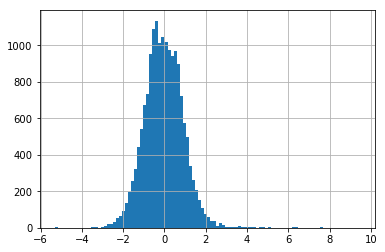

In [41]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

# Histogram of First Gene

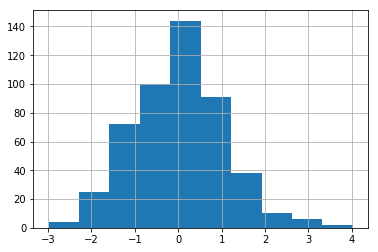

In [42]:
normalized_matrix.loc[normalized_matrix.index[0]].hist()

# Save Filtered Matrix

In [43]:
filename = path+'aba_dev_mic_samp_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [44]:
gene_list = mf.createGeneList(normalized_matrix)

In [45]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A4GALT,53947


In [46]:
gene_list.shape

(16827, 2)

# Save Gene List

In [47]:
filename = path+'aba_dev_mic_samp_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [58]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

In [60]:
for index in metaData.index:
    metaData.loc[index, 'Structure'] = index.split('_')[0]
    metaData.loc[index, 'Age'] = index.split('_')[1]
    metaData.loc[index, 'Gender'] = index.split('_')[2]
    metaData.loc[index, 'Donor ID'] = index.split('_')[3]

In [61]:
metaData.head()

,Structure,Age,Gender,Donor ID
amygdaloid complex_1 yrs_F_12830,amygdaloid complex,1 yrs,F,12830
amygdaloid complex_12 pcw_F_12835,amygdaloid complex,12 pcw,F,12835
amygdaloid complex_12 pcw_F_12960,amygdaloid complex,12 pcw,F,12960
amygdaloid complex_12 pcw_F_13060,amygdaloid complex,12 pcw,F,13060
amygdaloid complex_13 pcw_M_12820,amygdaloid complex,13 pcw,M,12820


In [62]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [63]:
attribute_list.head()

,Structure,Age,Gender,Donor ID
Attributes,,,,
amygdaloid complex_1 yrs_F_12830,amygdaloid complex,1 yrs,F,12830
amygdaloid complex_12 pcw_F_12835,amygdaloid complex,12 pcw,F,12835
amygdaloid complex_12 pcw_F_12960,amygdaloid complex,12 pcw,F,12960
amygdaloid complex_12 pcw_F_13060,amygdaloid complex,12 pcw,F,13060
amygdaloid complex_13 pcw_M_12820,amygdaloid complex,13 pcw,M,12820


In [64]:
attribute_list.shape

(492, 4)

# Save Attribute List

In [65]:
filename = path+'aba_dev_mic_samp_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [66]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [67]:
standard_matrix.head()

,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,amygdaloid complex_16 pcw_M_12837,amygdaloid complex_16 pcw_M_12879,...,ventrolateral prefrontal cortex_3 yrs_F_12836,ventrolateral prefrontal cortex_3 yrs_M_12980,ventrolateral prefrontal cortex_30 yrs_F_12290,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12296,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.236733,-0.466459,-0.072201,0.297697,-0.206344,-0.876830,-0.328253,-0.271360,-0.218526,-0.405482,...,0.631022,-0.913388,-0.202269,-0.169733,0.135095,-0.255115,0.480560,-0.962072,-0.982354,-0.921502
A1CF,-0.910125,-0.828897,-0.268104,-0.690726,-0.329051,-0.446937,-0.633868,-0.666364,0.585509,-0.032333,...,0.557013,-0.077079,0.731946,-0.576974,0.382253,-0.780134,-0.068938,-0.215263,0.813288,-0.970984
A2M,0.798426,-0.673098,-0.644661,-0.697467,-0.989851,-0.595904,0.058494,0.176346,-0.331729,-0.299203,...,0.322672,0.464920,0.460861,0.403947,0.769971,0.517779,0.542158,-0.217914,-0.311384,0.119445
A2ML1,0.952386,-0.726668,-0.121079,-0.555999,-0.917585,-0.698204,0.366653,0.541428,0.013055,-0.568183,...,0.346287,0.956466,0.813947,0.106501,0.260947,0.386967,0.598374,0.240635,-0.714467,0.724477
A4GALT,-0.522335,0.835469,0.188939,0.868023,-0.254095,-0.282569,0.790707,0.713415,-0.595502,-0.449187,...,-0.327250,-0.619856,0.941327,-0.952946,-0.445137,-0.010210,-0.351614,-0.054930,-0.034607,0.566947


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

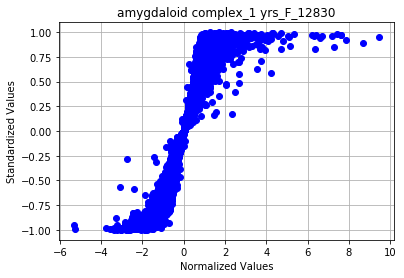

In [68]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [69]:
filename = path+'aba_dev_mic_samp_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [70]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [71]:
tertiary_matrix.head()

,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,amygdaloid complex_16 pcw_M_12837,amygdaloid complex_16 pcw_M_12879,...,ventrolateral prefrontal cortex_3 yrs_F_12836,ventrolateral prefrontal cortex_3 yrs_M_12980,ventrolateral prefrontal cortex_30 yrs_F_12290,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12296,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,-1,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
A2M,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0


# Save Teriary Matrix

In [72]:
filename = path+'aba_dev_mic_samp_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [90]:
name = 'aba_dev_mic_samp_gene_up_set'

In [91]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [92]:
name = 'aba_dev_mic_samp_gene_down_set'

In [93]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [94]:
name = 'aba_dev_mic_samp_attribute_up_set'

In [95]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [96]:
name = 'aba_dev_mic_samp_attribute_down_set'

In [97]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [81]:
attribute_similarity_matix = mf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [82]:
attribute_similarity_matix.head()

,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,amygdaloid complex_16 pcw_M_12837,amygdaloid complex_16 pcw_M_12879,...,ventrolateral prefrontal cortex_3 yrs_F_12836,ventrolateral prefrontal cortex_3 yrs_M_12980,ventrolateral prefrontal cortex_30 yrs_F_12290,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12296,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841
,,,,,,,,,,,,,,,,,,,,,
amygdaloid complex_1 yrs_F_12830,1.000000,-0.261973,-0.274962,-0.143423,-0.241432,-0.203930,0.329952,0.364361,-0.155542,-0.169230,...,0.100248,0.153350,0.315806,0.237735,0.281450,0.443526,0.368370,0.120110,-0.163572,0.185649
amygdaloid complex_12 pcw_F_12835,-0.261973,1.000000,0.695862,0.590153,0.546079,0.780880,-0.279882,-0.150713,0.491284,0.487587,...,-0.091989,-0.205413,-0.317584,-0.281531,-0.314323,-0.326286,-0.285778,-0.199619,0.650640,-0.146504
amygdaloid complex_12 pcw_F_12960,-0.274962,0.695862,1.000000,0.576904,0.467401,0.690688,-0.302542,-0.152996,0.415852,0.611680,...,-0.072201,-0.240744,-0.321718,-0.276684,-0.357906,-0.260535,-0.313863,-0.140873,0.485508,-0.219540
amygdaloid complex_12 pcw_F_13060,-0.143423,0.590153,0.576904,1.000000,0.339977,0.519906,-0.118560,-0.100355,0.326540,0.351412,...,-0.163719,-0.348519,-0.339156,-0.271082,-0.174289,-0.136204,-0.204130,-0.276154,0.395138,-0.197132
amygdaloid complex_13 pcw_M_12820,-0.241432,0.546079,0.467401,0.339977,1.000000,0.577335,-0.326836,-0.285358,0.456445,0.485173,...,-0.241388,-0.214598,-0.298052,-0.233680,-0.269503,-0.206175,-0.347270,-0.233456,0.601784,-0.336680


# Save Attribute Similarity Matrix

In [83]:
filename = path+'aba_dev_mic_samp_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

In [102]:
# net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# # net.filter_N_top('row', rank_type='sum', N_top=300)
# net.cluster()
# net.widget()

# Create Gene Similarity Matrix

In [85]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [86]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.181466,0.012077,-0.004669,-0.060639,0.310517,-0.047025,0.162704,0.004097,0.079286,...,-0.100007,-0.308520,0.032436,0.131141,-0.000285,0.044016,0.099056,-0.001850,0.149806,-0.157804
A1CF,0.181466,1.000000,0.139595,0.207973,-0.082827,0.114226,-0.152413,0.052134,0.075814,0.122075,...,-0.186873,-0.219420,-0.102014,0.117404,-0.018823,-0.042754,-0.018828,0.009562,0.039295,-0.192581
A2M,0.012077,0.139595,1.000000,0.656892,0.046629,0.076769,-0.669942,0.208205,-0.067819,0.153248,...,-0.713734,-0.471370,-0.607262,0.256626,-0.181770,-0.298140,-0.360997,-0.103955,-0.376078,-0.597519
A2ML1,-0.004669,0.207973,0.656892,1.000000,-0.129323,0.046943,-0.643856,0.266413,0.034085,0.178023,...,-0.703678,-0.383933,-0.635778,0.295555,0.009859,-0.259316,-0.281064,-0.199608,-0.353293,-0.607546
A4GALT,-0.060639,-0.082827,0.046629,-0.129323,1.000000,-0.163717,0.170019,-0.178685,-0.207171,-0.222420,...,0.166454,0.142255,0.128605,0.024492,-0.244993,-0.049812,-0.128893,0.035202,-0.166780,0.103189


# Save Gene Similarity Matrix

In [87]:
filename = path+'aba_dev_mic_samp_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [88]:
name = 'aba_dev_mic_samp_gene_attribute_edge_list'

In [89]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  492 Out of 492   

 The number of statisticaly relevent gene-attribute associations is: 413974
